In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, ConfusionMatrixDisplay

In [3]:
data=pd.read_csv("data/RiesgoCardio.csv")

In [4]:
data.head()

,Edad,Sexo,IMC,Presion_Sistolica,Presion_Diastolica,Colesterol_Total,Glucosa_Ayunas,Frecuencia_Cardiaca,Actividad_Min_Semana,Tabaquismo_Nivel,Antecedente_Familiar,Riesgo_Cardiometabolico
0,63,0,31.48,148.5,81.7,213.7,85.1,79.6,261,3,1,1
1,26,0,28.49,105.0,83.4,130.2,98.2,52.6,155,0,0,0
2,73,0,27.29,153.4,93.3,245.6,132.4,79.0,309,1,1,1
3,35,0,24.50,124.0,91.6,199.6,66.4,71.0,115,3,0,0
4,63,0,28.38,137.3,78.3,239.0,83.8,81.4,32,0,1,0


In [5]:
data.shape

(500, 12)

In [6]:
data.columns

Index(['Edad', 'Sexo', 'IMC', 'Presion_Sistolica', 'Presion_Diastolica',
       'Colesterol_Total', 'Glucosa_Ayunas', 'Frecuencia_Cardiaca',
       'Actividad_Min_Semana', 'Tabaquismo_Nivel', 'Antecedente_Familiar',
       'Riesgo_Cardiometabolico'],
      dtype='object')

In [7]:
data.describe()

,Edad,Sexo,IMC,Presion_Sistolica,Presion_Diastolica,Colesterol_Total,Glucosa_Ayunas,Frecuencia_Cardiaca,Actividad_Min_Semana,Tabaquismo_Nivel,Antecedente_Familiar,Riesgo_Cardiometabolico
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,51.670000,0.458000,27.29500,124.034400,79.629200,201.015600,99.491600,74.297400,168.088000,1.666000,0.510000,0.348000
std,19.383202,0.498732,4.83124,14.513553,9.575115,46.158611,27.002001,10.307892,93.075207,1.101304,0.500401,0.476813
min,18.000000,0.000000,16.00000,90.000000,55.000000,120.000000,65.000000,47.500000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,23.92750,113.475000,73.200000,168.575000,77.700000,67.475000,102.750000,1.000000,0.000000,0.000000
50%,51.500000,0.000000,27.28500,124.100000,79.800000,199.150000,96.700000,74.200000,170.500000,2.000000,1.000000,0.000000
75%,68.000000,1.000000,30.56500,134.125000,85.525000,233.875000,117.050000,81.225000,230.250000,3.000000,1.000000,1.000000
max,85.000000,1.000000,44.31000,173.400000,117.000000,339.000000,202.200000,104.800000,446.000000,3.000000,1.000000,1.000000


In [8]:
X=data.iloc[:,0:11]
X.head()

,Edad,Sexo,IMC,Presion_Sistolica,Presion_Diastolica,Colesterol_Total,Glucosa_Ayunas,Frecuencia_Cardiaca,Actividad_Min_Semana,Tabaquismo_Nivel,Antecedente_Familiar
0,63,0,31.48,148.5,81.7,213.7,85.1,79.6,261,3,1
1,26,0,28.49,105.0,83.4,130.2,98.2,52.6,155,0,0
2,73,0,27.29,153.4,93.3,245.6,132.4,79.0,309,1,1
3,35,0,24.50,124.0,91.6,199.6,66.4,71.0,115,3,0
4,63,0,28.38,137.3,78.3,239.0,83.8,81.4,32,0,1


In [9]:
data['Riesgo_Cardiometabolico'].value_counts()

Riesgo_Cardiometabolico
0    326
1    174
Name: count, dtype: int64

In [10]:
Y=data.iloc[:,11]
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Riesgo_Cardiometabolico, dtype: int64

**stratify** = significa mantener la proporcion de clases en cada conjunto de entrenamiento y prueba

In [11]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, random_state=42,stratify=Y)

In [12]:
scaler=StandardScaler()

Es **escalamiento** siempre se hace con los datos de entrenamiento NO con los de prueba

In [13]:
X_train_scaled = scaler.fit_transform(X_train)

In [14]:
X_test_scaled=scaler.transform(X_test)

In [15]:
svm=SVC(kernel="rbf", C=1.0,gamma="scale", random_state=42)

In [16]:
svm.fit(X_train_scaled,Y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [17]:
svm_score=svm.score(X_test_scaled,Y_test)
print(f"Accuracy: {svm_score}")

Accuracy: 0.7


In [18]:
svm_pred=svm.predict(X_test_scaled)

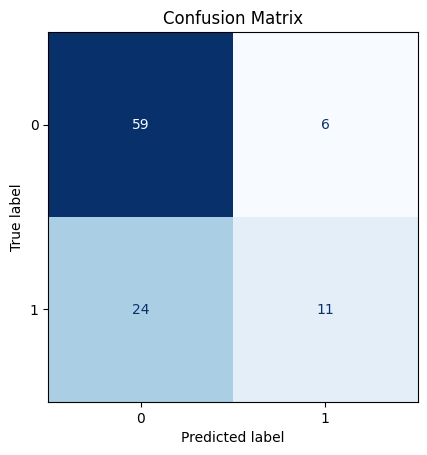

In [19]:
cm = confusion_matrix(Y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", colorbar=False)
plt.title("Confusion Matrix")
plt.show()

In [21]:
print(classification_report(Y_test, svm_pred, target_names=["0-no enfermo", "1-si enfermo"], digits=3))

              precision    recall  f1-score   support

0-no enfermo      0.711     0.908     0.797        65
1-si enfermo      0.647     0.314     0.423        35

    accuracy                          0.700       100
   macro avg      0.679     0.611     0.610       100
weighted avg      0.689     0.700     0.666       100



In [22]:
tree = DecisionTreeClassifier(random_state=42)

In [24]:
tree.fit(X_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
tree_score=tree.score(X_test, Y_test)
print("Accuracy:", tree_score)

Accuracy: 0.66


In [27]:
tree_pred = tree.predict(X_test)

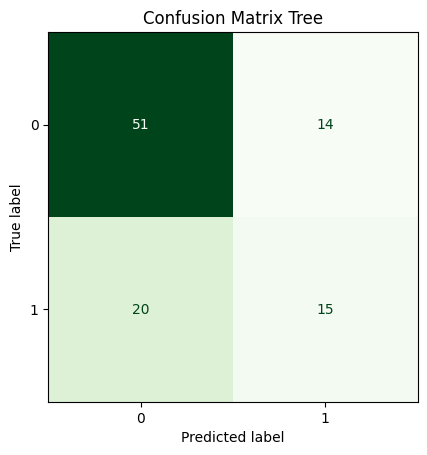

In [28]:
cm = confusion_matrix(Y_test, tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens", colorbar=False)
plt.title("Confusion Matrix Tree")
plt.show()

In [29]:
print(classification_report(Y_test, tree_pred, target_names=["0-Sin riesgo", "1-Con riesgo"],digits=3))

              precision    recall  f1-score   support

0-Sin riesgo      0.718     0.785     0.750        65
1-Con riesgo      0.517     0.429     0.469        35

    accuracy                          0.660       100
   macro avg      0.618     0.607     0.609       100
weighted avg      0.648     0.660     0.652       100



In [30]:
def resumen_metricas(y_true, y_pred):
    r = classification_report(y_true, y_pred, output_dict=True)
    return {
        "Accuracy": r["accuracy"],
        "Precision": r["1"]["precision"],
        "Recall": r["1"]["recall"],
        "F1-score": r["1"]["f1-score"]
    }

In [32]:
svm_metrics = resumen_metricas(Y_test, svm_pred)
tree_metrics = resumen_metricas(Y_test, tree_pred)
comparacion = pd.DataFrame(
    [svm_metrics, tree_metrics],
    index=["SVM", "Árbol"]
    )
comparacion.round(3)

,Accuracy,Precision,Recall,F1-score
SVM,0.70,0.647,0.314,0.423
Árbol,0.66,0.517,0.429,0.469
